# Get color values from an image

### References
- [OpenCV documentation](https://opencv.org/)
- [Display images in Python](https://www.askpython.com/python/examples/display-images-using-python)
- [Get unique colors in an image](https://stackoverflow.com/questions/24780697/numpy-unique-list-of-colors-in-the-image)
- [Python to JSON](https://www.geeksforgeeks.org/reading-and-writing-json-to-a-file-in-python/)

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2 as cv
from json import loads, dumps

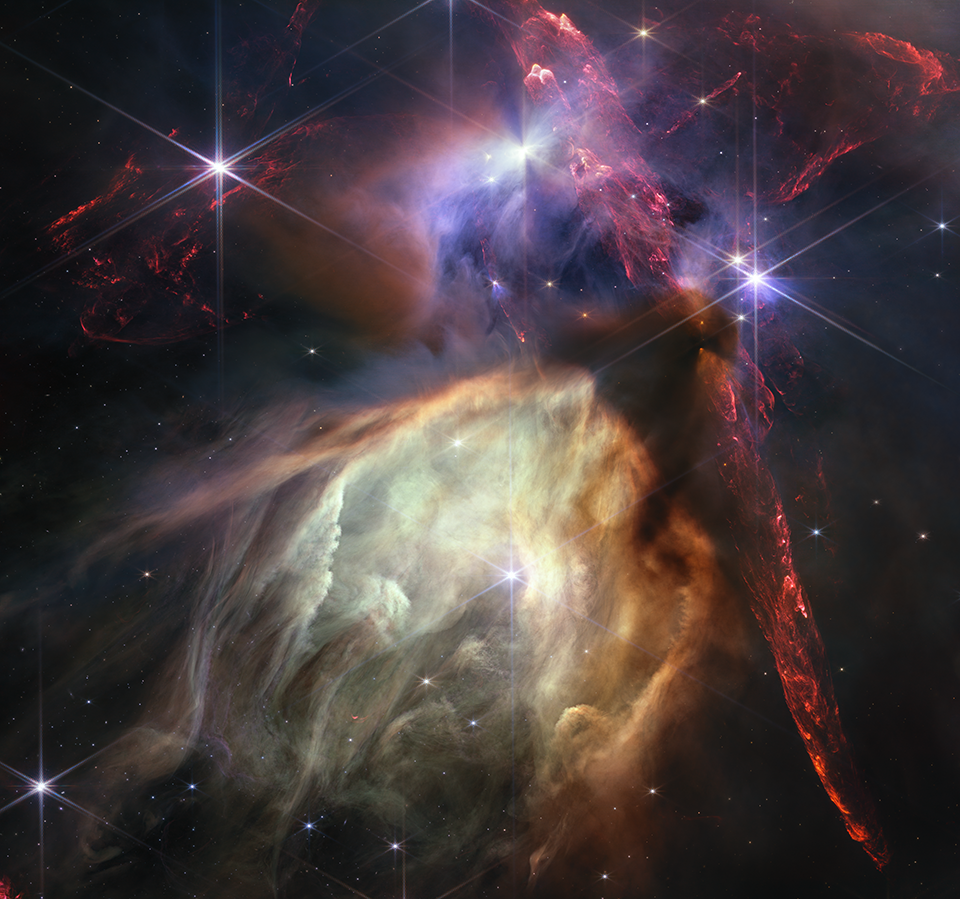

In [2]:
# load image
img = '../src/images/example.png'
show_img = Image.open(img)
show_img

In [3]:
# Get RGB values 
read_img = cv.imread(img)
img_df = read_img.reshape(-1, read_img.shape[2])

# All colors (all pixel values)

all_colors = pd.DataFrame(img_df)
all_colors = all_colors.rename(columns={0: "Blue", 1: "Green", 2: "Red"})  # OpenCV uses BGR

# Unique colors
uniqueColors = pd.DataFrame(np.unique(read_img.reshape(-1, read_img.shape[2]), axis=0))

print('Number of unique colors: ' + str(len(uniqueColors)))
print('Total number of pixels: ' + str(len(all_colors)))  # width x height of image = 863040

all_colors


libpng warning: iCCP: known incorrect sRGB profile


Number of unique colors: 256857
Total number of pixels: 863040


,Blue,Green,Red
0,14,13,10
1,15,14,12
2,15,14,12
3,15,14,12
4,15,14,11
...,...,...,...
863035,19,18,18
863036,20,19,17
863037,19,18,18
863038,19,18,20


In [4]:
# Print values to CSV, comment out after exporting
# os.makedirs('exports/', exist_ok=True)  
# all_colors.to_csv('all_colors.csv', index=False)

In [5]:
result = all_colors.to_json(orient="table")
parsed = loads(result)

json_object = dumps(parsed, indent=4)  
with open("example.json", "w") as outfile:
    outfile.write(json_object)